<a href="https://colab.research.google.com/github/sahupra1357/FeatureEngineering/blob/main/feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

     |████████████████████████████████| 290 kB 6.9 MB/s 
     |████████████████████████████████| 243 kB 44.7 MB/s 
     |████████████████████████████████| 1.3 MB 31.5 MB/s 
     |████████████████████████████████| 125 kB 57.8 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 271 kB 69.8 MB/s 
     |████████████████████████████████| 160 kB 54.4 MB/s 


In [3]:
import numpy as np
import pandas as pd
import os
from typing import List, Tuple
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.pipeline import FeatureUnion, Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import list_datasets, load_dataset, list_metrics
sns.set()

In [4]:
print(list_datasets())

['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'ami', 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19', 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect', 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset', 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic', 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli', 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent', 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bn_hate_speech', 'bookcorpus', 'bookcorpusopen', 'boolq', 'bprec', 'break_data', 'brwac', 'bsd_ja_en', 'bswac', 'c3', 'c4', 'cail2018', 'caner', 'capes', 'casino', 'catalo

In [5]:
# Load a dataset and print the first examples in the training set
imdb_data = load_dataset('imdb')

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
classifier = svm.LinearSVC(C=1.0, class_weight="balanced")
model = Pipeline(
    [
        ("vectorizer", TfidfVectorizer()),
        ("classifier", classifier),
    ]
)
x_train = [x["text"]for x in imdb_data["train"]]
y_train = [x["label"]for x in imdb_data["train"]]
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
                           fit_intercept=True, intercept_scaling=

In [8]:
print(model.named_steps["vectorizer"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


With a basic pipeline it's easy to grab features.  We just have to remember what each named feature step is and grab those.

In [9]:
# Get the names of each feature
feature_names = model.named_steps["vectorizer"].get_feature_names()

# Get the coefficients of each feature
coefs = model.named_steps["classifier"].coef_.flatten()

In [10]:
# Visualize feature importances
# Sort features by absolute value
df = pd.DataFrame(zip(feature_names, coefs), columns=["feature", "value"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

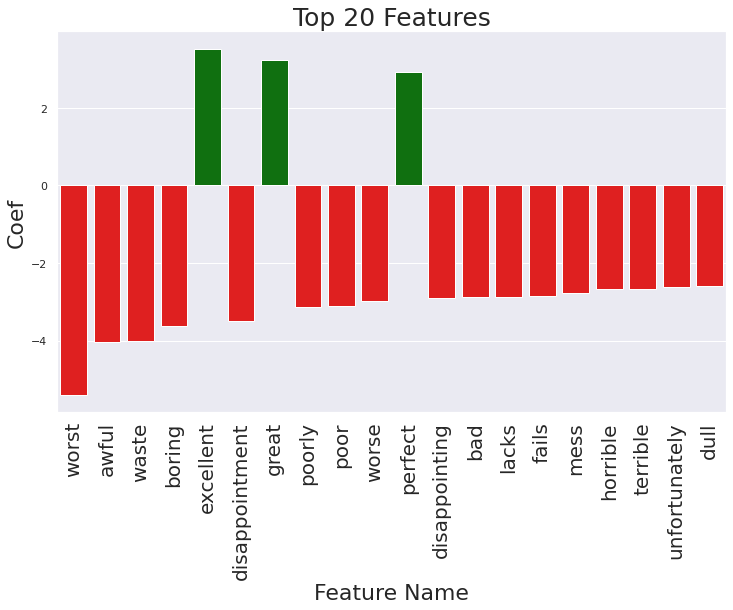

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

We can quickly see that the algorithm picks up strongly on the negative words like worst, awful, boring, etc.  With far fewer "positive" words impacting the prediction.  That's cool, and these visualizations can be super helpful to spot check your model and make sure it's doing a good job but this is a bit of a contrived example.  Pipelines are great for things like this, they certainly look clean, are easy to use, and keep our featurization in step with our model but I rarely use them with so few steps.  The real question becaomes how can we get these feature importances in general, when out pipelines involve more than one step.

Let's try by hand then see if we can generalize : ).

In [12]:
classifier = svm.LinearSVC(C=1.0, class_weight="balanced")
vocab = {"worst": 0, "awful": 1, "waste": 2,
         "boring": 3, "excellent": 4}
model = Pipeline([
    ("union", FeatureUnion(transformer_list=[
        ("handpicked", TfidfVectorizer(vocabulary=vocab)),
        ("bigrams", TfidfVectorizer(ngram_range=(2, 2)))])
    ),
    ("classifier", classifier),
    ])

In [13]:
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('handpicked',
                                                 TfidfVectorizer(analyzer='word',
                                                                 binary=False,
                                                                 decode_error='strict',
                                                                 dtype=<class 'numpy.float64'>,
                                                                 encoding='utf-8',
                                                                 input='content',
                                                                 lowercase=True,
                                                                 max_df=1.0,
                                                                 max_features=None,
                                                                 min_df=1,
                   

In [14]:
handpicked = (model
              .named_steps["union"]
              .transformer_list[0][1]
              .get_feature_names())

bigrams = (model
           .named_steps["union"]
           .transformer_list[1][1]
           .get_feature_names())

feature_names = handpicked + bigrams

In [15]:
# Get the coefficients of each feature
coefs = model.named_steps["classifier"].coef_.flatten()

In [16]:
# Visualize feature importances
# Sort features by absolute value
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

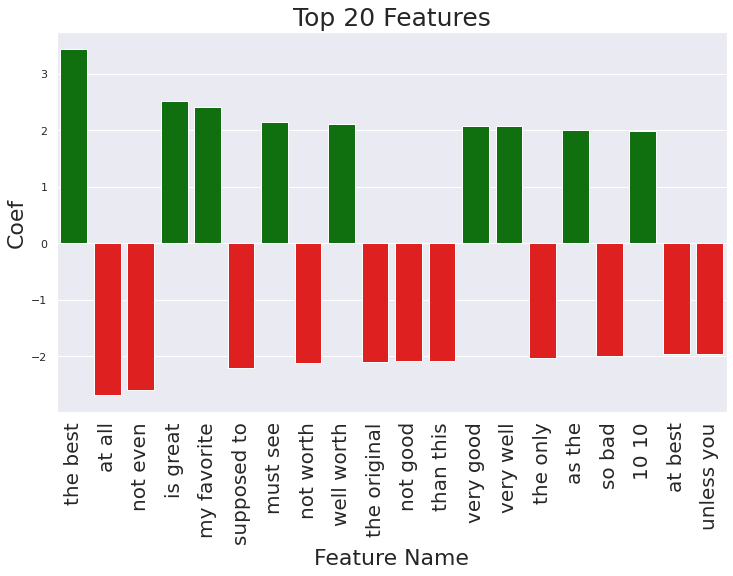

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [18]:
def extract_feature_names(model, name) -> List[str]:
    if hasattr(model, "get_feature_names"):
        return model.get_feature_names()
    elif hasattr(model, "n_clusters"):
        return [f"{name}_{x}" for x in range(model.n_clusters)]
    elif hasattr(model, "n_components"):
        return [f"{name}_{x}" for x in range(model.n_components)]
    elif hasattr(model, "components_"):
        n_components = model.components_.shape[0]
        return [f"{name}_{x}" for x in range(n_components)]
    elif hasattr(model, "classes_"):
        return classes_
    else:
        return [name]


def get_feature_names(model, names: List[str], name: str) -> List[str]:
    """Thie method extracts the feature names in order from a Sklearn Pipeline
    
    This method only works with composed Pipelines and FeatureUnions.  It will
    pull out all names using DFS from a model.
    
    Args:
        model: The model we are interested in
        names: The list of names of final featurizaiton steps
        name: The current name of the step we want to evaluate.
    
    Returns:
        feature_names: The list of feature names extracted from the pipeline.
    """
    
    # Check if the name is one of our feature steps.  This is the base case.
    if name in names:
        # If it has the named_steps atribute it's a pipeline and we need to access the features
        if hasattr(model, "named_steps"):
            # FIXME:: NEED BASE CASE
            return extract_feature_names(model.named_steps[name], name)
        # Otherwise get the feature directly
        else:
            return extract_feature_names(model, name)
    elif type(model) is Pipeline:
        feature_names = []
        for name in model.named_steps.keys():
            feature_names += get_feature_names(model.named_steps[name], names, name)
        return feature_names
    elif type(model) is FeatureUnion:
        feature_names= []
        for name, new_model in model.transformer_list:
            feature_names += get_feature_names(new_model, names, name)
        return feature_names
    # If it is none of the above do not add it.
    else:
        return []

In [19]:
feature_names = get_feature_names(model, ["bigrams", "handpicked"], "union")

In [20]:
feature_names[:10]

['worst',
 'awful',
 'waste',
 'boring',
 'excellent',
 '00 01',
 '00 after',
 '00 alison',
 '00 am',
 '00 and']

In [21]:
from sklearn.decomposition import TruncatedSVD
classifier = svm.LinearSVC(C=1.0, class_weight="balanced")
vocab = {"worst": 0, "awful": 1, "waste": 2,
         "boring": 3, "excellent": 4}
model = Pipeline([
    ("union", FeatureUnion(transformer_list=[
        ("h1", TfidfVectorizer(vocabulary={"worst": 0})),
        ("h2", TfidfVectorizer(vocabulary={"best": 0})),
        ("h3", TfidfVectorizer(vocabulary={"awful": 0})),
        ("tfidf_cls", Pipeline([
            ("vectorizer", CountVectorizer()),
            ("transformer", TfidfTransformer()),
            ("tsvd", TruncatedSVD(n_components=2))
        ]
        ))
    ])
     ),
    ("classifier", classifier),
])

model.fit(x_train, y_train)

NameError: ignored

In [ ]:
feature_names = get_feature_names(model, ["h1", "h2", "h3", "tsvd"], None)

In [ ]:
feature_names

['worst', 'best', 'awful', 'tsvd_0', 'tsvd_1']